# Week 1 Exercise Solutions

## Part 1

(a) In units with $G=1$, the orbital frequency is given by $\Omega^2 = (m_1+m_2)/a^3$ and then $P_\mathrm{orb}=2\pi/\Omega$. Using the value of $a$ from REBOUND (`o.a`) agrees with the value of `o.P` (see code below).

(b) Removing the `sim.move_to_com()` line causes the orbit to slowly drift upwards because the initial velocities are such that the centre of mass has a net velocity given by $$(m_1+m_2)v_\mathrm{com} = m_1 v_1 + m_2 v_2$$ (eq. 2.106 in section 2.7). In this case, $v_\mathrm{com} = 0.1\times 1.3 / 1.1 = 0.118$. In one period, the orbit drifts by an amount $0.118\times 18.98\approx 2.24$ in the $y$-direction.

(c) When you rescale the orbits, the trajectories of the two stars and the relative motion all lie on top of one another, as expected from the discussion in section 2.7 (eq. 2.109). The instantaneous orbit drawn by REBOUND is the orbit of the relative motion. It is offset slightly because it is drawn centred on the primary rather than centred on the origin. (For more on the coordinates used by the code, you can look at [this video](https://youtu.be/FoTwDtAeJyk?si=Ui85pzAo6Ep3ffAk&t=500), or also p441/442 of the book).

(d) We can use the equations in section 2.8 to evaluate the orbital elements if we take $G=1$. Using $h = x v_y = 1.3$, $R = 1$, $V=1.3$, eq. (2.134) and (2.135) give the same values of $a$ and $e$ as REBOUND (see below).

From eq. (2.135), $e=0$ for $a = h^2/(m_1+m_2)$. Then using eq. (2.134), 
$$a = {h^2\over m_1+m_2} = \left({2\over R} - {V^2\over m_1+m_2}\right)^{-1}$$
and then since the circular orbit has $R=a$, we can solve for the corresponding velocity which gives $$V_\mathrm{circ} = \sqrt{m_1+m_2\over a}$$
or $\sqrt{1.1}$ for our values. Checking numerically, this does indeed give a circular orbit in REBOUND. Smaller velocities than this give an eccentric orbit where the initial location is the apastron, whereas larger value give an eccentric orbit where the initial location is the periastron.

-0.09090909090909091 0.0 0.0
0.9090909090909091 0.0 0.0
<rebound.Orbit instance, a=2.1568627450980395 e=0.5363636363636364 inc=0.0 Omega=0.0 omega=0.0 f=0.0>
Orbital period =  18.97655132331586  Predicted value =  18.97655132331586
v_com =  0.11818181818181818
v_circ =  1.0488088481701516


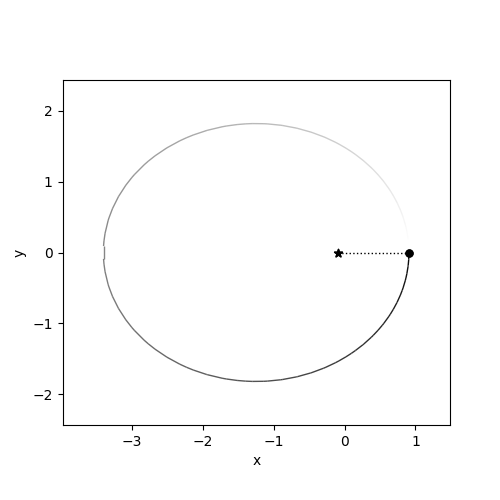

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import rebound
import time
import numpy as np
plt.close('all')

m1 = 1
m2 = 0.1

# Scaling factors to rescale the orbit (see section 2.7)
scale1 = -(1 + m1/m2)
scale2 = 1 + m2/m1
#scale1 = 1
#scale2 = 1

# set up the simulation
sim = rebound.Simulation()
sim.add(m=m1)
# the initial condition given originally
sim.add(m=m2, x=1, vy=1.3)
# the next line chooses a velocity to give a circular orbit
#sim.add(m=0.1, x=1, vy=1.1**0.5)
sim.move_to_com()

# plot the positions and instantaneous orbit
op = rebound.OrbitPlot(sim, periastron=True)

# output info about the particles and the orbit
for p in sim.particles:
    print(p.x, p.y, p.z)
for o in sim.orbits(): 
    print(o)

# The predicted orbital period is 2pi/Omega where Omega^2 = M/a^3 (since G=1)
print('Orbital period = ', o.P, ' Predicted value = ', 2*np.pi * (o.a**3/1.1)**0.5)

print("v_com = ", 0.1*1.3/1.1)
print("v_circ = ", 1.1**0.5)

In [2]:
p_orb = sim.orbits()[0].P

# store the positions of the primary and secondary
Noutputs = 100
times = np.linspace(0, 1.0*p_orb, Noutputs)
x1vec = np.zeros(Noutputs)
y1vec = np.zeros(Noutputs)
x2vec = np.zeros(Noutputs)
y2vec = np.zeros(Noutputs)
x1vec[0] = sim.particles[0].x
y1vec[0] = sim.particles[0].y
x2vec[0] = sim.particles[1].x
y2vec[0] = sim.particles[1].y
op2, = plt.plot(scale2 * x2vec[:1], scale2 * y2vec[:1], 'C1')
op3, = plt.plot(scale1 * x1vec[:1], scale1 * y1vec[:1], 'C0')
op4, = plt.plot(x2vec[:1]-x1vec[:1], y2vec[:1]-y1vec[:1], 'C2--')

for i in range(100):
    # integrate for 1% of the orbit
    op.sim.integrate(times[i])

    # store the trajectory of primary and secondary
    x2vec[i] = sim.particles[1].x
    y2vec[i] = sim.particles[1].y
    x1vec[i] = sim.particles[0].x
    y1vec[i] = sim.particles[0].y

    # update the plot to animate it
    op.update() 
    op2.set_data((scale2 * x2vec[:i+1], scale2 * y2vec[:i+1])) 
    op3.set_data((scale1 * x1vec[:i+1], scale1 * y1vec[:i+1])) 
    op4.set_data((x2vec[:i+1]-x1vec[:i+1], y2vec[:i+1]-y1vec[:i+1])) 
    time.sleep(0.001)
    op.fig.canvas.draw()

In [3]:
# predicting the orbital elements for part (d)
h = 1.3
V = 1.3
R = 1
a = 1/((2/R) - V**2/(m1+m2)) # (2.134)
e = (1 - h**2 / (a*(m1+m2)))**0.5
print(a, e)

2.156862745098039 0.5363636363636363


## Part 2

### Guiding Centre

P,a,e =  6.283185307179588 1.0000000000000002 0.10000000000000023
rms error / e^2 =  6.341725845812492


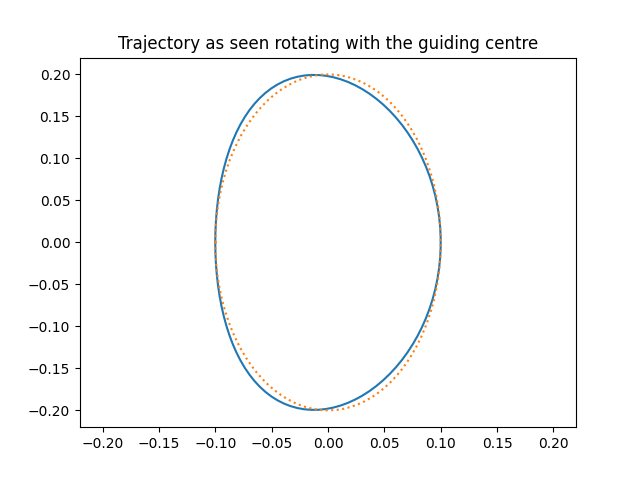

In [4]:
%matplotlib widget
import matplotlib.pyplot as plt
import rebound
import time
import numpy as np
plt.close('all')

sim = rebound.Simulation()
sim.add(m=1)
sim.add(m=0, a=1, e=0.1)
sim.move_to_com()

p_orb = sim.orbits()[0].P
n = 2*np.pi/p_orb
a = sim.orbits()[0].a
e = sim.orbits()[0].e
print("P,a,e = ", p_orb,a,e)

# store the position of the secondary
Noutputs = 100
times = np.linspace(0, 1.0*p_orb, Noutputs)
x = np.zeros(Noutputs)
y = np.zeros(Noutputs)
for i,time in enumerate(times):
    sim.integrate(time, exact_finish_time=1)
    x[i] = sim.particles[1].x
    y[i] = sim.particles[1].y

# plot limits
lim = 2.2 * a * e
plt.ylim((-lim,lim))
plt.xlim((-lim,lim))

# guiding centre location
M = n * times
x0 = a * np.cos(M)
y0 = a * np.sin(M)

# location relative to guiding centre
dx = x-x0
dy = y-y0
# rotate coordinates
dx1 = dx*np.cos(M) + dy*np.sin(M)
dy1 = -dx*np.sin(M) + dy*np.cos(M)

# plot the motion in this frame and the analytic prediction
plt.plot(dx1, dy1)
plt.plot(-a*e*np.cos(M), 2*a*e*np.sin(M), ":")
plt.title("Trajectory as seen rotating with the guiding centre")

# residual
err2 = np.sum( (dx1+a*e*np.cos(M))**2 + (dy1-2*a*e*np.sin(M))**2)
print("rms error / e^2 = ", np.sqrt(err2)/e**2)

### Applying forces

Radial and tangential forces:

P,a,e =  6.283182165589292 1.0000000000000002 2.2204438288064844e-16


Text(0.5, 0, 't')

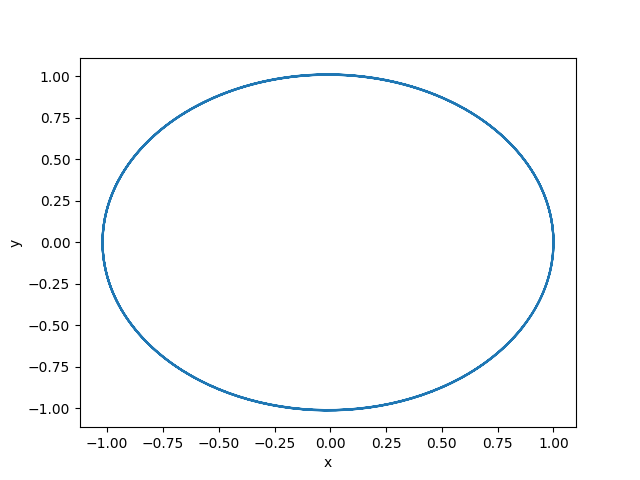

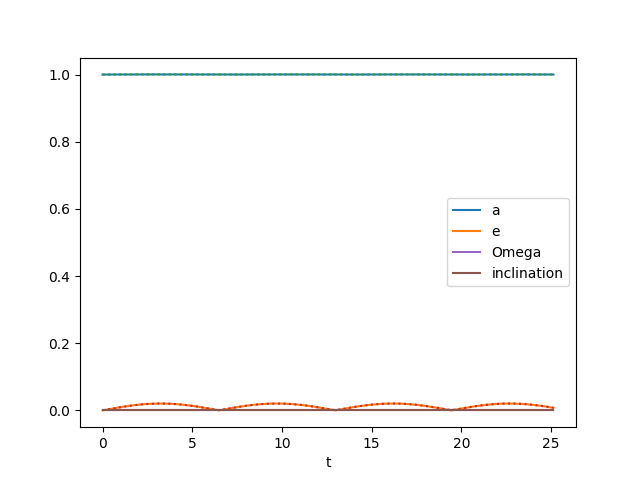

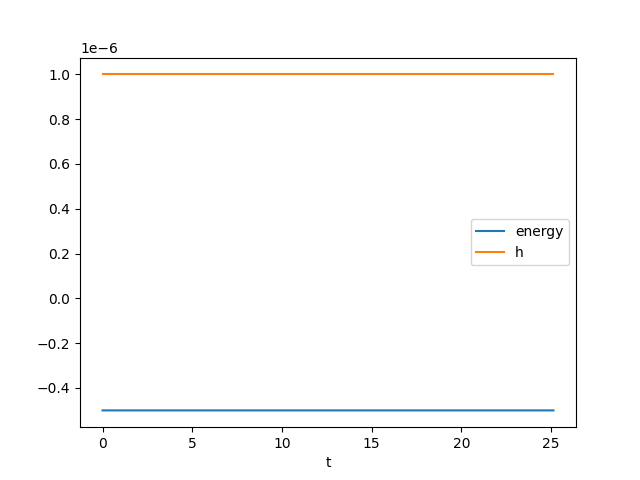

In [14]:
%matplotlib widget
import matplotlib.pyplot as plt
import rebound
import time
import numpy as np
plt.close('all')

sim = rebound.Simulation()
sim.add(m=1)
m2 = 1e-6
sim.add(m=m2, a=1, e=0)
sim.move_to_com()

ps = sim.particles
c = 0.01
def starkForce(reb_sim):
    x = ps[1].x
    y = ps[1].y
    r = (x**2+y**2)**0.5
    # radial force
    ps[1].ax += c * x/r
    ps[1].ay += c * y/r
    # azimuthal force
    #ps[1].ax += -c * y/r
    #ps[1].ay += c * x/r

sim.additional_forces = starkForce

p_orb = sim.orbits()[0].P
n = 2*np.pi/p_orb
a = sim.orbits()[0].a
e = sim.orbits()[0].e
print("P,a,e = ", p_orb,a,e)

# store the position of the secondary
Noutputs = 1000
times = np.linspace(0, 4.0*p_orb, Noutputs)
x = np.zeros(Noutputs)
y = np.zeros(Noutputs)
a = np.zeros(Noutputs)
e = np.zeros(Noutputs)
Omega = np.zeros(Noutputs)
inc = np.zeros(Noutputs)
ener = np.zeros(Noutputs)
h = np.zeros(Noutputs)
for i,time in enumerate(times):
    sim.integrate(time, exact_finish_time=1)
    x[i] = sim.particles[1].x
    y[i] = sim.particles[1].y
    a[i] = sim.orbits()[0].a
    e[i] = sim.orbits()[0].e
    Omega[i] = sim.orbits()[0].Omega
    inc[i] = sim.orbits()[0].inc
    ener[i] = sim.energy()
    hx,hy,h[i] = sim.angular_momentum()

plt.figure()
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')

plt.figure()
plt.plot(times, a, label = 'a')
plt.plot(times, e, label = 'e')
plt.plot(times, -m2*0.5/ener, ":")   # semi-major axis from the energy
plt.plot(times, (1 + 2*h*h*ener/m2**3)**0.5, ":")   # eccentricity from h and E
plt.plot(times, Omega, label = 'Omega')
plt.plot(times, inc, label = 'inclination')
plt.legend()
plt.xlabel('t')

plt.figure()
plt.plot(times, ener, label='energy')
plt.plot(times, h, label='h')
plt.legend()
plt.xlabel('t')


Normal force:

P,a,e =  6.283182165589295 1.0000000000000007 0.5000000000000003


Text(0.5, 0, 't')

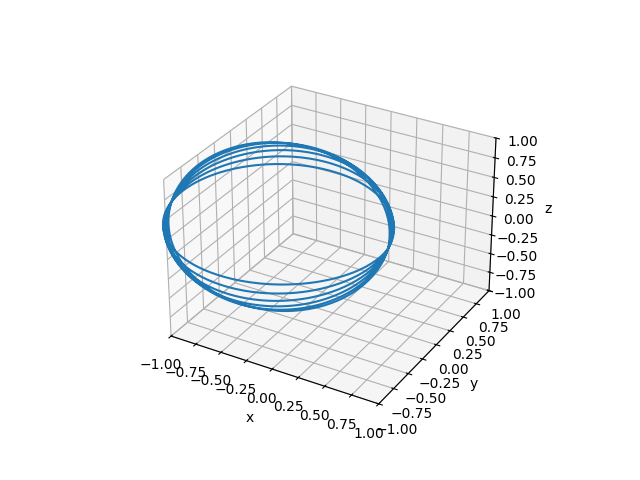

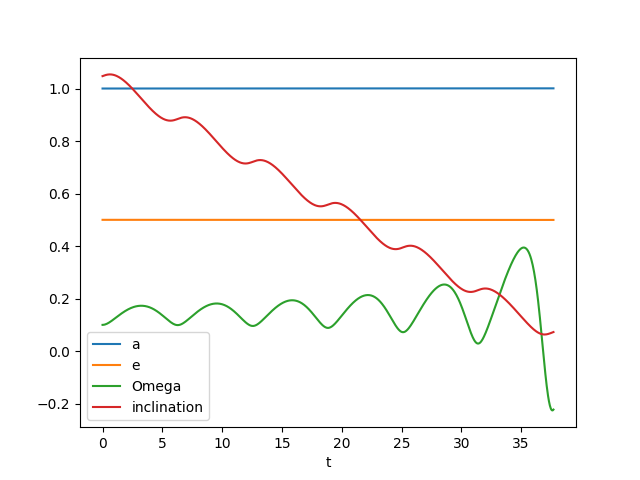

In [6]:
%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D projection
import rebound
import time
import numpy as np
plt.close('all')

sim = rebound.Simulation()
sim.add(m=1)
m2 = 1e-6
sim.add(m=m2, a=1, e=0.5, inc=np.pi/3, Omega=0.1)
sim.move_to_com()

ps = sim.particles
c = 0.03
def starkForce(reb_sim):
    x = ps[1].x
    y = ps[1].y
    z = ps[1].z
    vx = ps[1].vx
    vy = ps[1].vy
    vz = ps[1].vz
    hx = y*vz-z*vy
    hy = -x*vz+z*vx
    hz = x*vy-y*vx
    h = (hx*hx + hy*hy + hz*hz)**0.5
    # force in direction of instantaneous ang mom vector
    ps[1].ax += c * hx/h
    ps[1].ay += c * hy/h
    ps[1].az += c * hz/h

sim.additional_forces = starkForce

p_orb = sim.orbits()[0].P
n = 2*np.pi/p_orb
a = sim.orbits()[0].a
e = sim.orbits()[0].e
print("P,a,e = ", p_orb,a,e)

# store the position of the secondary
Noutputs = 1000
times = np.linspace(0, 6*p_orb, Noutputs)
x = np.zeros(Noutputs)
y = np.zeros(Noutputs)
z = np.zeros(Noutputs)
a = np.zeros(Noutputs)
e = np.zeros(Noutputs)
Omega = np.zeros(Noutputs)
inc = np.zeros(Noutputs)
ener = np.zeros(Noutputs)
h = np.zeros(Noutputs)
for i,time in enumerate(times):
    sim.integrate(time, exact_finish_time=1)
    x[i] = sim.particles[1].x
    y[i] = sim.particles[1].y
    z[i] = sim.particles[1].z
    a[i] = sim.orbits()[0].a
    e[i] = sim.orbits()[0].e
    Omega[i] = sim.orbits()[0].Omega
    inc[i] = sim.orbits()[0].inc
    ener[i] = sim.energy()
    hx,hy,h[i] = sim.angular_momentum()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x, y, z)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

plt.figure()
plt.plot(times, a, label = 'a')
plt.plot(times, e, label = 'e')
plt.plot(times, Omega, label = 'Omega')
plt.plot(times, inc, label = 'inclination')
plt.legend()
plt.xlabel('t')

### Velocity space

P,a,e =  6.283185307179582 0.9999999999999996 0.4999999999999998


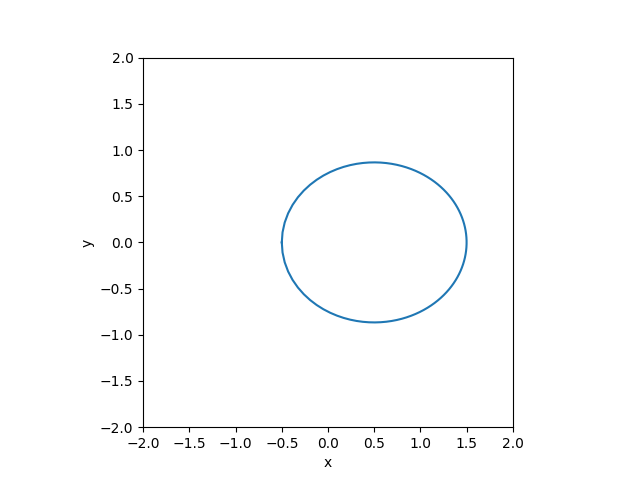

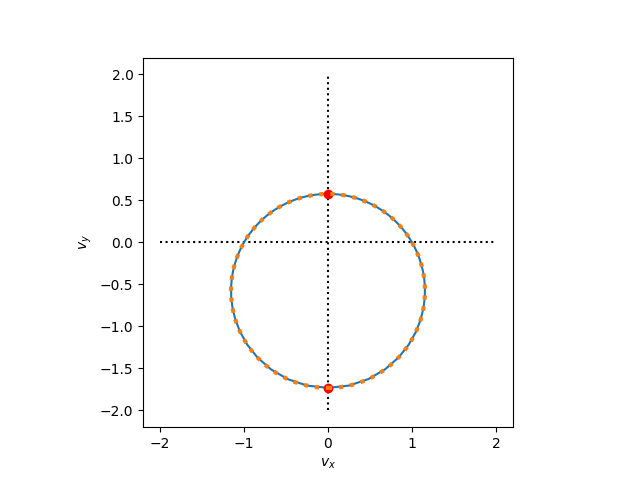

In [7]:
%matplotlib widget
import matplotlib.pyplot as plt
import rebound
import time
import numpy as np
plt.close('all')

sim = rebound.Simulation()
sim.add(m=1)
sim.add(m=0, a=1, e=0.5, omega=np.pi)
sim.move_to_com()

p_orb = sim.orbits()[0].P
n = 2*np.pi/p_orb
a = sim.orbits()[0].a
e = sim.orbits()[0].e
print("P,a,e = ", p_orb,a,e)

# store the position and velocity of the secondary
Noutputs = 100
times = np.linspace(0, 1.0*p_orb, Noutputs)
x = np.zeros(Noutputs)
y = np.zeros(Noutputs)
vx = np.zeros(Noutputs)
vy = np.zeros(Noutputs)
for i,time in enumerate(times):
    sim.integrate(time, exact_finish_time=1)
    x[i] = sim.particles[1].x
    y[i] = sim.particles[1].y
    vx[i] = sim.particles[1].vx
    vy[i] = sim.particles[1].vy

# plot the motion in this frame and the analytic prediction
plt.figure()
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('square')
plt.xlim((-2,2))
plt.ylim((-2,2))

plt.figure()
plt.xlim((-2,2))
plt.ylim((-2,2))
plt.plot([-2,2],[0,0],'k:')
plt.plot([0,0],[-2,2],'k:')
plt.plot(vx, vy)
plt.xlabel(r'$v_x$')
plt.ylabel(r'$v_y$')
plt.axis('square')

# prediction for peri and apo velocities (eqs. 2.35)
vp = n*a*((1+e)/(1-e))**0.5
va = n*a*((1-e)/(1+e))**0.5
plt.plot([0],[-vp],'ro')
plt.plot([0],[va],'ro')

# analytic velocities (eq. 2.36): a circle offset from the origin
f = np.linspace(0,2*np.pi,100)
pref = n*a/(1-e*e)**0.5
vx = pref * np.sin(f)
vy = -pref * (e  + np.cos(f))
plt.plot(vx,vy,':',lw=3)
